# Tests

## 1. Tests for iterations number

Below tests for sinuses functions (see [Description of tests functions properties](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/Tests/Description.pdf) part 1.1). We generate this functions for constant array of lists of parameters. A square in task is square with vertices $(0, 0), (0, 1), (1, 0), (1, 1)$.

This functions met conditions of lemma 2 (see [Description of method](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/One%20method.pdf)).

Each point on graph is parameter of task - upper bound for iterations number - and iterations number.

<IPython.core.display.Javascript object>


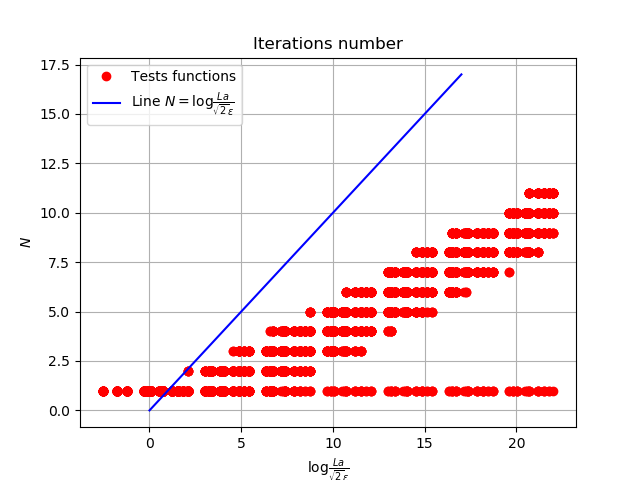

In [2]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import comparison
import matplotlib.pyplot as plt
%matplotlib notebook

eps = [0.1**i for i in range(7)]
comparison.num_iter_tests(eps)

Results of this experiment met theoretical results for number of iterations (see Theorem 4.1 in [Description of method](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/One%20method.pdf)).

## 2. Estimates for accuracy of solution on segment

There are three strategies for to stop search of solution on segment. Below $\delta$ is a distance between current point-approximation and accurate solution.

* **The first strategy** - Little big
$$\delta \leq \frac{M_{der}}{L},$$
where $L$ is a Lipschitz constant for *gradient*, $M_{der}$ is a lower bound of derivative on $y$ for parallel to axis $Ox$ segment and derivative on $x$ for parallel to axis $Oy$ segment in point solution on segment. For this strategy an estimate is computed on each new segment. This strategy is workable (see theorem 4.1 in [Description of method](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/One%20method.pdf))

* **The second strategy** - Constant estimate for all segments

$$\delta \leq \frac{\epsilon}{2La\sqrt{5}\log_2\frac{2Ma\sqrt{2}}{\epsilon}},$$

where $L$ and $M$ are Lipschitz constant for *gradient* and *function*, $a$ is a size of square, $\epsilon$ is a required accuracy of initial task's solution. This strategy requires to compute the estimate one time for the one start method. There is proof for this istimate in theorem 1 in [Article of Pasechnyuk and Stonyakin](https://arxiv.org/pdf/1812.10300.pdf).

* **The third strategy** - Comparison with gradient in current point

$$\delta \leq \frac{\|\nabla f(\textbf{x}_{approx})\|}{L},$$
where $\textbf{x}_{approx}$ is current point-approximation, $L$ is a Lipschitz constant for *gradient*. This condition can work if solution on segment is internal point (see theorem 4.3 in [Description of method](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/One%20method.pdf)). Otherwise we use the first strategy. If we will use this estimate we must to compute estimate on each iterations of method that solve one-dimensional task.

**Important remark**: in the halving square method we use golden search selection as method that solve one-dimensional task.

In [3]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import estimates
%matplotlib notebook

epsilon = [0.1**(i) for i in range(7)]
estimates.get_tests_estimates(epsilon)

eps =  1.0e+00
Mean time (True gradient) = 0.96ms
Mean time (Constant estimate) = 1.70ms
Mean time (Current gradient) = 1.80ms
eps =  1.0e-01
Mean time (True gradient) = 1.63ms
Mean time (Constant estimate) = 3.34ms
Mean time (Current gradient) = 3.20ms
eps =  1.0e-02
Mean time (True gradient) = 2.37ms
Mean time (Constant estimate) = 5.46ms
Mean time (Current gradient) = 4.70ms
eps =  1.0e-03
Mean time (True gradient) = 4.07ms
Mean time (Constant estimate) = 10.43ms
Mean time (Current gradient) = 8.26ms
eps =  1.0e-04
Mean time (True gradient) = 4.83ms
Mean time (Constant estimate) = 13.54ms
Mean time (Current gradient) = 9.96ms
eps =  1.0e-05
Mean time (True gradient) = 4.86ms
Mean time (Constant estimate) = 14.69ms
Mean time (Current gradient) = 9.90ms
eps =  1.0e-06
Mean time (True gradient) = 6.08ms
Mean time (Constant estimate) = 38.19ms
Mean time (Current gradient) = 12.60ms


## 3. Comparison of gradient descent and our method

In following tests on graphic there are following names of type for tasks' results:

* Type 1 (T1) - tasks which gradient descent completed but halving square was not complete,

* Type 2 (T2) - gradient descent is faster than halving square,

* Type 3 (T3) - work's times are approximately equal or time is too short to measure,

* Type 4 (T4) - gradient descent is slower than halving square,

* Type 5 (T5) - gradient descent was not complete but halving square completed,

* Type 6 (T6) - both methods were not completed successfully

### 3.1. Sinuses

Generation of functions and square is same as before for sinuses.

In this part we use that choice of rectangle does not depend on found point on separating segment.

<IPython.core.display.Javascript object>


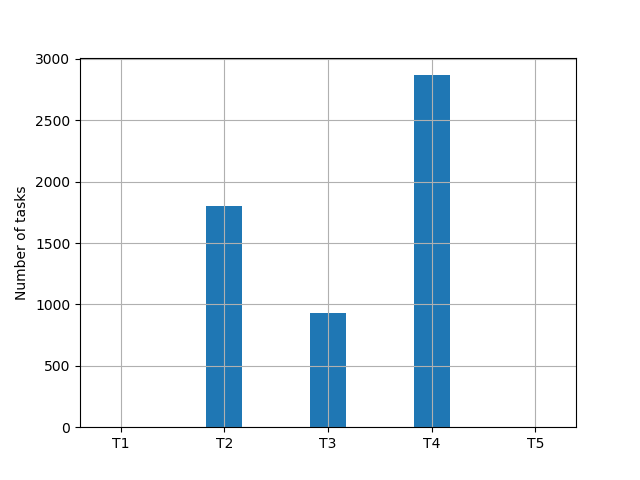

In [4]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import comparison
import matplotlib.pyplot as plt
%matplotlib notebook

epsilon = [0.1**(i) for i in range(7)]
comparison.comparison_GD_HS_sinuses(epsilon)

### 3.2 Quadratic functions
See [Description of tests functions properties](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/Tests/Description.pdf) part 1.2. In this tests we use the constant estimate for accuracy on separating segment. See the description in the previous section.

<IPython.core.display.Javascript object>


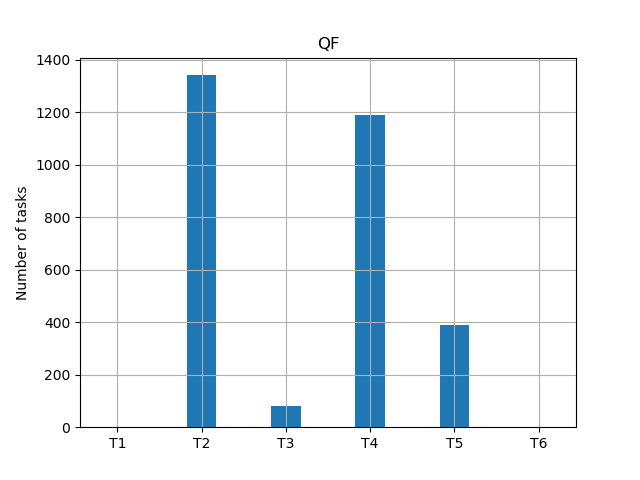

In [2]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import comparison
import matplotlib.pyplot as plt
%matplotlib notebook

epsilon = [0.1**(i) for i in range(7)]
comparison.comparison_GD_HS_QFunc(epsilon)